# Clustering US Cities Based on Crime Statistics

## 1. Introduction

One of the important considerations people take into account before they make a city home is the safety record of the city. Everything else being the same, people would prefer cities with lower criminal profiles to those with higher cirminal profiles. My internet search for "important factors when choosing a city to live" features crime rate in all the entries on the first page of results. 


    Where Should I Live? 14 Important Factors When Deciding the Best Place to Live: https://www.moneycrashers.com/where-should-i-live-decide-best-places/

    The Most Important Factors in Choosing a Place to Live: https://medium.com/@jinlinh/the-most-important-factors-in-choosing-a-place-to-live-39f39f2fc7ed


    11 Essential Questions to Answer “Where Should I Live?”: https://www.openlistings.com/blog/11-factors-to-help-you-decide-where-to-live/

    Where Should I Live? 6 Factors to Consider When Choosing a Neighborhood: https://www.tchabitat.org/blog/how-to-choose-a-neighborhood

    How to Choose Where to Live: https://www.thespruce.com/find-best-place-to-live-2435883

    Factors to Consider When Deciding Where to Live: https://www.homes.com/blog/2017/07/factors-consider-deciding-live/

    7 Things to Consider When Choosing a Neighborhood: https://realtybiznews.com/7-things-to-consider-when-choosing-a-neighborhood/98753418/



In this report, I will look into the crime statistics for the largest 100 US cities, look at the correlation between different types of crimes, and cluster them based on their crime statistics. This will help someone who is considering to move from one city to another to compare the cities in terms of their safety record.  

Crime is, of course, not the only criterion people consider in choosing which city to move. Amenities available in the city is also an important consideration. In the second part of the report, I will use the Foursquare data to cluster cities based on the venues available in these cities. I will also investigate if there is any relation between the clusters based on crime statistics and clusters based the venues. 

## 2. Data

In this report, I use two main sources of data. 
    1. Crime statistics for the largest 100 US cities
    2. Foursquare location data for the same 100 US cities

I obtained the crime statistics from a Wikipedia page: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate

The table on the page lists number of crimes committed per 100,000 people in three major categories: Violent Crime, Property Crime, and Arson. Under Violent Crime, subcategories are Murder, Rape, Robbery, and Aggravated Assault. Under Property Crime, the listed crimes are Theft, Burglary, and Motor vehicle Theft. Arson is the only crime listed under Arson. The table also includes the population data.

The crime table is based on Federal Bureau of Investigation Uniform Crime Reports statistics from 2017. The page also notes that population numbers are based on U.S. Census estimates. 

I will discuss the exploratory data analysis I did on this data set in the Methodology section. 

I also used the Foursquare location data for the 100 cities listed in the Wikipedia page. I extracted information about the venue name and the venue category as I did not plan to map each city with its venues. 

The purpose of using Foursquare venue data is twofold: i) to see if there is any connection between crime statistic clusters and venue clusters, and ii) to look at the top venues available in the lowest crime cities if we can choose among them based on the venues available. 

I also mapped each type of cluster using Folium map. 

## 3. Methodology

I start with importing necessary libraries. 

In [1]:
#for essential data science operations
import pandas as pd
import numpy as np

In [2]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

###  3.1 Crime Data Exploration

I extract my main source of data from the Wikipedia page that provides the crime statistics table for the 100 largest US cities. 

In [3]:
url_crime = 'https://en.wikipedia.org/wiki/List_of_United_States_cities_by_crime_rate'

In [4]:
df_crime = pd.read_html(url_crime)[0]

As the first step, I check the data using the head() and shape methods. 

In [5]:
df_crime.head()

State       City Population Violent crime  \
     State       City Population         Total   
0  Alabama    Mobile3     248431        740.25   
1   Alaska  Anchorage     296188       1203.29   
2  Arizona   Chandler     249355        259.47   
3  Arizona    Gilbert     242090         85.51   
4  Arizona   Glendale     249273        488.22   

                                                                           \
  Murder and Nonnegligent manslaughter   Rape1 Robbery Aggravated assault   
0                                20.13   57.16  177.11             485.85   
1                                 9.12  132.01  262.67             799.49   
2                                 2.01   52.13   56.95             148.38   
3                                 2.07   16.11   21.07              46.26   
4                                 4.81   38.91  192.96             251.53   

  Property crime                                            Arson2  
           Total Burglary Larceny-theft Motor vehicle theft Arson2  
0        5453.83  1216.84       3730.21              506.78  22.94  
1        5415.82   748.17       3619.66             1047.98  20.93  
2        2329.61   314.41       1866.01              149.18    NaN  
3        1385.85   192.49       1137.59               55.76  12.39  
4        4530.37   637.45       3426.36              466.56  19.26

The data has two levels of indexing for column names which I will have to flatten out.

In [6]:
df_crime.shape

(100, 13)

I have 100 cities and 13 variables in the data set. Two of the variables are the city and state name and one is population. Thus, I have 10 variables on crime statistics. 

In [7]:
df_crime.describe()

Population Violent crime                                       \
         Population         Total Murder and Nonnegligent manslaughter   
count  1.000000e+02     96.000000                           100.000000   
mean   6.597258e+05    726.724896                            11.677100   
std    9.789645e+05    451.414551                            10.992247   
min    2.163500e+05     61.210000                             0.720000   
25%    2.674942e+05    415.582500                             4.185000   
50%    3.882175e+05    649.065000                             8.595000   
75%    6.769322e+05    947.870000                            15.702500   
max    8.616333e+06   2082.290000                            66.070000   

                                                 Property crime               \
            Rape1     Robbery Aggravated assault          Total     Burglary   
count   96.000000  100.000000         100.000000     100.000000   100.000000   
mean    59.931667  229.274100         430.540300    3592.127000   647.612300   
std     28.818899  159.584269         287.058197    1345.847157   323.872754   
min     13.850000   19.920000          23.900000    1316.480000   128.870000   
25%     38.465000  127.540000         249.332500    2522.842500   382.092500   
50%     56.570000  191.090000         399.590000    3565.365000   599.735000   
75%     75.442500  306.512500         530.665000    4412.217500   833.040000   
max    144.670000  958.710000        1519.550000    7365.840000  1518.870000   

                                             Arson2  
      Larceny-theft Motor vehicle theft      Arson2  
count    100.000000          100.000000   92.000000  
mean    2466.824000          477.689900   24.661957  
std      953.287709          283.276318   20.870553  
min      915.500000           55.760000    0.730000  
25%     1813.807500          285.805000   10.277500  
50%     2378.305000          451.390000   18.370000  
75%     2921.770000          592.072500   33.360000  
max     5408.030000         1368.780000  129.550000

Summary statistics provided by the describe() method indicate that 4 cities are missing data for Rape and 8 cities are missing data for Arson. I will need to make decisions about the missing data. 

Arguably, different types of crimes are correlated with each other. If a city has a low number of murders, one can assume that it also has a low number of thefts, for instance. Using the corr() method, I check if that is indeed the case.  

In [8]:
df_crime.corr()

Population Violent crime  \
                                                    Population         Total   
Population     Population                             1.000000      0.036002   
Violent crime  Total                                  0.036002      1.000000   
               Murder and Nonnegligent manslaughter  -0.045309      0.810713   
               Rape1                                 -0.031456      0.583257   
               Robbery                                0.059752      0.885005   
               Aggravated assault                     0.020364      0.964590   
Property crime Total                                 -0.142383      0.634916   
               Burglary                              -0.154636      0.721395   
               Larceny-theft                         -0.119822      0.452774   
               Motor vehicle theft                   -0.096441      0.685723   
Arson2         Arson2                                 0.016637      0.634312   

                                                                                          \
                                                    Murder and Nonnegligent manslaughter   
Population     Population                                                      -0.045309   
Violent crime  Total                                                            0.810713   
               Murder and Nonnegligent manslaughter                             1.000000   
               Rape1                                                            0.406392   
               Robbery                                                          0.778858   
               Aggravated assault                                               0.736364   
Property crime Total                                                            0.467612   
               Burglary                                                         0.586901   
               Larceny-theft                                                    0.325906   
               Motor vehicle theft                                              0.453871   
Arson2         Arson2                                                           0.565375   

                                                                         \
                                                        Rape1   Robbery   
Population     Population                           -0.031456  0.059752   
Violent crime  Total                                 0.583257  0.885005   
               Murder and Nonnegligent manslaughter  0.406392  0.778858   
               Rape1                                 1.000000  0.453890   
               Robbery                               0.453890  1.000000   
               Aggravated assault                    0.534714  0.735887   
Property crime Total                                 0.587712  0.574181   
               Burglary                              0.515879  0.642965   
               Larceny-theft                         0.492456  0.407590   
               Motor vehicle theft                   0.558694  0.621195   
Arson2         Arson2                                0.285299  0.566386   

                                                                        \
                                                    Aggravated assault   
Population     Population                                     0.020364   
Violent crime  Total                                          0.964590   
               Murder and Nonnegligent manslaughter           0.736364   
               Rape1                                          0.534714   
               Robbery                                        0.735887   
               Aggravated assault                             1.000000   
Property crime Total                                          0.586241   
               Burglary                                       0.684185   
               Larceny-theft                                  0.411921   
               Motor veh

I can also look at the mean correlation for each variable to get a more concise metric.

In [9]:
df_crime.corr().mean()

Population      Population                              0.049337
Violent crime   Total                                   0.673517
                Murder and Nonnegligent manslaughter    0.553335
                Rape1                                   0.489713
                Robbery                                 0.611428
                Aggravated assault                      0.627215
Property crime  Total                                   0.596165
                Burglary                                0.595968
                Larceny-theft                           0.475138
                Motor vehicle theft                     0.554206
Arson2          Arson2                                  0.502066
dtype: float64

Looking at the correlation between different types of crimes, I notice that Rape has a low correlation with other types of crimes. One reason could be the fact that most rape is not related to the safety of the city as 80% of rape is committed by someone the victim knows. 

    Perpetrators of Sexual Violence Often Know the Victim 8 out of 10 rapes are committed by someone known to the victim. 'https://www.rainn.org/statistics/perpetrators-sexual-violence'

As such, it is reasonable to drop rape statistics in evauating safety of a city. 

Another question that comes to mind is the difference between burglary, robbery, and larceny (theft). A web search provides the following explanations as to the difference between burglary and larceny and the difference between robbery and larceny. In short, robbery involves threat of violence, and burglary involves entering a building and violating the privacy of one's home. 

    'Burglary (entering a building with the intent to commit a crime inside) and larceny (theft) are two different crimes, although burglaries are often committed for the purpose of theft. Burglary laws are intended to protect the sanctity and privacy of people’s homes and other structures. Laws against larceny protect personal property.' 
    https://www.criminaldefenselawyer.com/resources/whats-difference-between-burglary-and-larceny.htm

    "Robbery and larceny are both categorized as theft crimes. However, they are very different from one another. 

    Robbery is generally defined as: the unauthorized taking of another’s personal property from their presence, with the use of force or threats of serious bodily injury, and with intent to permanently deprive them of the object. Larceny is defined as: the unauthorized taking of another person’s property with the intent to permanently deprive them of the use of the property. 

    So, the basic distinction between robbery and larceny is that robbery involves the use of force, whereas larceny doesn’t."

    https://www.legalmatch.com/law-library/article/robbery-vs-larceny-charges.html

Based on this information, I decide to drop Larceny/Theft as well as Rape and Arson.  The simpler dataframe contains the following variables: Murder, Robbery, Assault, Burglary, and MV Theft. 

I also want to get rid of the multi-level columns. So, I create a new dataframe.

In [10]:
cols = ['State', 'City', 'Population', 'Murder', 'Robbery', 'Assault', 'Burglary', 'MV Theft']
index = range(df_crime.shape[0])
df1 = pd.DataFrame(index=index, columns=cols)
df1.head()

,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Next, I fill in the data from the Wikipedia table. 

In [11]:
df1['State']= df_crime['State']['State']
df1['City']= df_crime['City']['City']
df1['Population'] = df_crime['Population']['Population']/1000
df1['Murder'] = df_crime['Violent crime']['Murder and Nonnegligent manslaughter']
df1['Robbery'] = df_crime['Violent crime']['Robbery']
df1['Assault'] = df_crime['Violent crime']['Aggravated assault']
df1['Burglary'] = df_crime['Property crime']['Burglary']
df1['MV Theft'] = df_crime['Property crime']['Motor vehicle theft']

df1.head()

,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft
0,Alabama,Mobile3,248.431,20.13,177.11,485.85,1216.84,506.78
1,Alaska,Anchorage,296.188,9.12,262.67,799.49,748.17,1047.98
2,Arizona,Chandler,249.355,2.01,56.95,148.38,314.41,149.18
3,Arizona,Gilbert,242.090,2.07,21.07,46.26,192.49,55.76
4,Arizona,Glendale,249.273,4.81,192.96,251.53,637.45,466.56


When I look at the head of new dataframe, I notice that the first city is listed as Mobile3, not as Mobile, because there is a note about the city. This is going to be a problem when I try to obtain location data to map these cities. A quick scan of the webpage shows that there are some other cities with the same problem and also some states. I write a loop to get rid of these notes using the string method of rstrip().  

In [12]:
City = []
State = []
length = df1.shape[0]
for num in range(length):
    City.append(df1['City'][num].rstrip('0123456789,'))
    State.append(df1['State'][num].rstrip('0123456789,'))
    
City[:5], State[:5]

(['Mobile', 'Anchorage', 'Chandler', 'Gilbert', 'Glendale'],
 ['Alabama', 'Alaska', 'Arizona', 'Arizona', 'Arizona'])

In [13]:
df1['City'] = City
df1['State'] = State
df1.head()

,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft
0,Alabama,Mobile,248.431,20.13,177.11,485.85,1216.84,506.78
1,Alaska,Anchorage,296.188,9.12,262.67,799.49,748.17,1047.98
2,Arizona,Chandler,249.355,2.01,56.95,148.38,314.41,149.18
3,Arizona,Gilbert,242.090,2.07,21.07,46.26,192.49,55.76
4,Arizona,Glendale,249.273,4.81,192.96,251.53,637.45,466.56


Next, I use the describe() method again to make sure all is fine. 

In [14]:
df1.describe()

,Population,Murder,Robbery,Assault,Burglary,MV Theft
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,659.725800,11.677100,229.274100,430.540300,647.612300,477.689900
std,978.964454,10.992247,159.584269,287.058197,323.872754,283.276318
min,216.350000,0.720000,19.920000,23.900000,128.870000,55.760000
25%,267.494250,4.185000,127.540000,249.332500,382.092500,285.805000
50%,388.217500,8.595000,191.090000,399.590000,599.735000,451.390000
75%,676.932250,15.702500,306.512500,530.665000,833.040000,592.072500
max,8616.333000,66.070000,958.710000,1519.550000,1518.870000,1368.780000


When I compare the mean values for different variables, I notice that there is large variation. The mean number of murders is less than 12 while the mean number of burglaries is 647. This will give much more weight to Burglary values using any statistical emthods. Therefore, I decide to standardize all the numerical values in the dataframe.  

In [15]:
df1['Population'] = (df1['Population']-df1['Population'].mean())/df1['Population'].std()
df1['Murder'] = (df1['Murder']-df1['Murder'].mean())/df1['Murder'].std()
df1['Robbery'] = (df1['Robbery']-df1['Robbery'].mean())/df1['Robbery'].std()
df1['Assault'] = (df1['Assault']-df1['Assault'].mean())/df1['Assault'].std()
df1['Burglary'] = (df1['Burglary']-df1['Burglary'].mean())/df1['Burglary'].std()
df1['MV Theft'] = (df1['MV Theft']-df1['MV Theft'].mean())/df1['MV Theft'].std()

df1.head()

,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft
0,Alabama,Mobile,-0.420133,0.768987,-0.326875,0.192678,1.757566,0.102692
1,Alaska,Anchorage,-0.371349,-0.232628,0.209268,1.285278,0.310485,2.013194
2,Arizona,Chandler,-0.419189,-0.879447,-1.079831,-0.982938,-1.028806,-1.159680
3,Arizona,Gilbert,-0.426610,-0.873989,-1.304666,-1.338684,-1.405250,-1.489464
4,Arizona,Glendale,-0.419272,-0.624722,-0.227554,-0.623603,-0.031377,-0.039290


In [16]:
df1.describe()

,Population,Murder,Robbery,Assault,Burglary,MV Theft
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.693679e-16,3.874678e-16,-7.283063e-16,-7.105427e-17,-1.024736e-15,-4.574119e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.529029e-01,-9.968026e-01,-1.311872e+00,-1.416578e+00,-1.601686e+00,-1.489464e+00
25%,-4.006596e-01,-6.815804e-01,-6.374945e-01,-6.312581e-01,-8.198275e-01,-6.773771e-01
50%,-2.773423e-01,-2.803885e-01,-2.392723e-01,-1.078189e-01,-1.478275e-01,-9.284186e-02
75%,1.757617e-02,3.662036e-01,4.839976e-01,3.487958e-01,5.725326e-01,4.037845e-01
max,8.127575e+00,4.948297e+00,4.570851e+00,3.793690e+00,2.690123e+00,3.145657e+00


Now, all means are virtually 0, all standard deviations are 1, by design, and it is more meaningful to compare statistics for different variables.

I recalculate the correlations for the standardized data. 

In [17]:
df1.corr()

,Population,Murder,Robbery,Assault,Burglary,MV Theft
Population,1.000000,-0.045309,0.059752,0.020364,-0.154636,-0.096441
Murder,-0.045309,1.000000,0.778858,0.736364,0.586901,0.453871
Robbery,0.059752,0.778858,1.000000,0.735887,0.642965,0.621195
Assault,0.020364,0.736364,0.735887,1.000000,0.684185,0.616788
Burglary,-0.154636,0.586901,0.642965,0.684185,1.000000,0.594452
MV Theft,-0.096441,0.453871,0.621195,0.616788,0.594452,1.000000


It is worth to point out that Population is negatively correlated with Murder, Burglary, and MV Theft. Although it is positively correlated with Robbery and Assault, the sizes are smaller. This suggests that larger cities being more dangerous is a myth. 

At this point, I want to visualize the distribution of the variables and the relation between them. 

I start importing graphing libraries. 

In [18]:
pop = df1['Population']
murder = df1['Murder']
robbery = df1['Robbery']
assault = df1['Assault']
burglary = df1['Burglary']
mv_theft = df1['MV Theft']

In [19]:
pops = sorted(df1['Population'])
murders = sorted(df1['Murder'])
robberys = sorted(df1['Robbery'])
assaults = sorted(df1['Assault'])
burglarys = sorted(df1['Burglary'])
mv_thefts = sorted(df1['MV Theft'])

In [20]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

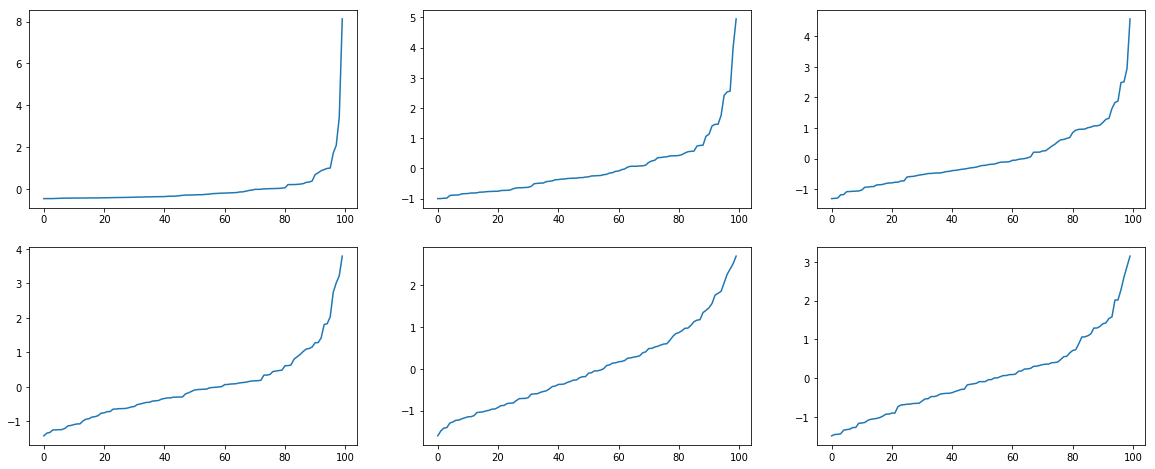

In [21]:
%matplotlib inline 
fig = plt.figure(figsize=(20, 8)) 
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.plot(pops)
ax2.plot(murders)
ax3.plot(robberys)
ax4.plot(assaults)
ax5.plot(burglarys)
ax6.plot(mv_thefts)
plt.show()

A plot of sorted Population and crime statistics show that safest places are about one standard deviation below the mean in all crime categories. Most crimes, and especially murder, are a major problem in a handful of cities. Based on these we may expect to get one small cluster with a huge crime problem.  

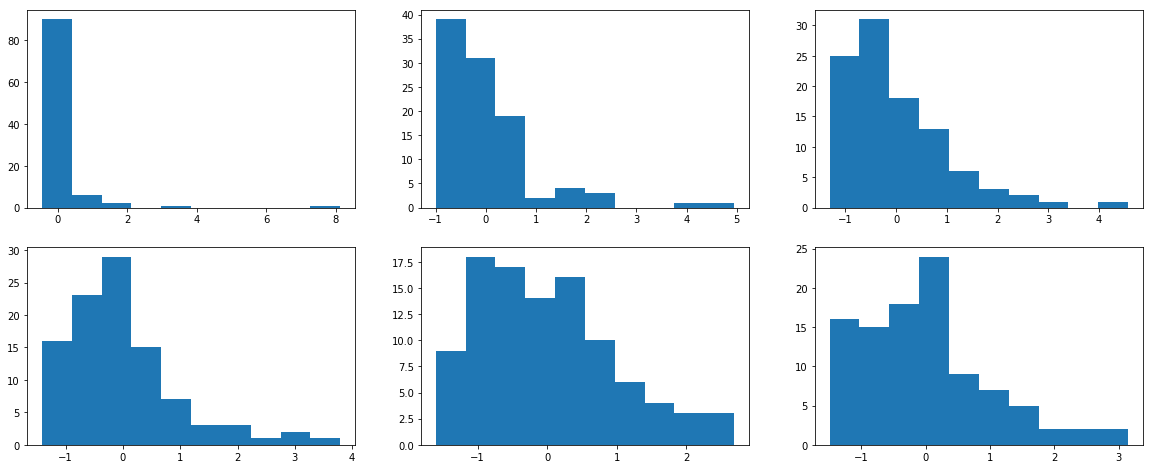

In [22]:
%matplotlib inline 
fig = plt.figure(figsize=(20, 8)) 
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax1.hist(pop)
ax2.hist(murder)
ax3.hist(robbery)
ax4.hist(assault)
ax5.hist(burglary)
ax6.hist(mv_theft)

plt.show()

A group of histograms paint a similar picture. Other than a small number of cities, most cities are within one standard deviation away from the average crime levels. 

### 3.2 Crime Clusters

Now, I am ready to cluster the data based on crime statistics. 

I start importing the kmeans clustering library.

First, I create a features vector, X, by dropping State, City, and Population. I drop Population because I do not want the clusters to be based on population, only on crime statistics. 

In [23]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [24]:
X = df1.drop(['State', 'City', 'Population'], axis=1)
X.head()

,Murder,Robbery,Assault,Burglary,MV Theft
0,0.768987,-0.326875,0.192678,1.757566,0.102692
1,-0.232628,0.209268,1.285278,0.310485,2.013194
2,-0.879447,-1.079831,-0.982938,-1.028806,-1.159680
3,-0.873989,-1.304666,-1.338684,-1.405250,-1.489464
4,-0.624722,-0.227554,-0.623603,-0.031377,-0.039290


Before running the kmeans clustering algorithm, I first use the elbow method to determine the appropriate number of clusters.  

In [25]:
# calculate the distortion at each k for k from 1 to 9.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

Next, I plot the distortions to find a visual cue.

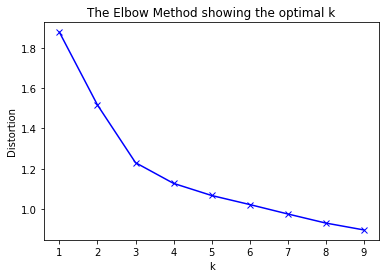

In [26]:
# Plot the elbow
plt.plot()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method indicates that k=3 is a reasonable choice for the number of clusters. An alternative is to choose k=7, but it will be difficult to interpret results with such fine clustering. Therefore, I will use k=3. 

In [27]:
kclusters = 3

In [28]:
# run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 1, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1])

In [29]:
df1.insert(0, 'Safety Cluster', kmeans.labels_)

df1.head() 

,Safety Cluster,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft
0,2,Alabama,Mobile,-0.420133,0.768987,-0.326875,0.192678,1.757566,0.102692
1,2,Alaska,Anchorage,-0.371349,-0.232628,0.209268,1.285278,0.310485,2.013194
2,0,Arizona,Chandler,-0.419189,-0.879447,-1.079831,-0.982938,-1.028806,-1.159680
3,0,Arizona,Gilbert,-0.426610,-0.873989,-1.304666,-1.338684,-1.405250,-1.489464
4,2,Arizona,Glendale,-0.419272,-0.624722,-0.227554,-0.623603,-0.031377,-0.039290


I discuss the results in Section 4.1. 

### 3.3 Foursquare Location Data Exploration

In [30]:
#@hidden_cell

CLIENT_ID = 'D3QIHY0IXET4VCGE4WL1HBBBHT1ZPNNSNKXTPSM2YNQ1M3BO' 
CLIENT_SECRET = 'PXZ0R0JR52GDDY5THHHLCWWOI2JWLQBZEZBNWQLWVXVDSXBQ' 
VERSION = '20180604'

In this section, following the Week 3 lab example, I will obtain the location data for the largest 100 US cities. I will then cluster them based on the venues available choosing the number of clusters using the elbow method. Finally, I will check if there is any relation between clusters based on crime statistics and clusters based on venue categories. 

Before obtaining the Foursquare venue data, I need to extract the coordinate information for the US cities in my dataframe. 

We need to change the name for one of the cities. Las Vegas, Nevada is listed as Las Vegas Metropolitan Police Department, Nevada, in our dataframe, and the geolocator cannot find it in the address list. To get a full list of coordinates, I will change the name to 'Las Vegas.' I found about this while trying to obtain coordinates. For the brevity's sake, I will just proceed by replacing instead of repeating the error.


In [31]:
df1[df1['City']== 'Las Vegas Metropolitan Police Department']

,Safety Cluster,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft
59,2,Nevada,Las Vegas Metropolitan Police Department,0.988308,0.083959,-0.113571,-0.400756,0.48648,0.08956


In [32]:
df1.at[59, 'City'] = 'Las Vegas'
df1['City'][59]

'Las Vegas'

In [ ]:
I import Nominatim to get location data.

In [34]:
from geopy.geocoders import Nominatim

Now, the city name is corrected, I will get the coordinate information cities in the dataframe. 

In [35]:
latitude = []
longitude = []
count = 0
geolocator = Nominatim(user_agent="explorer")

for num in range(df1.shape[0]):
    address = df1['City'][num] + ', ' + df1['State'][num]
    #print(count, address)
    count += 1
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

I will add latitude and longitude to the dataframe.

In [36]:
df1['Latitude'] = latitude
df1['Longitude'] = longitude
df1.head()

,Safety Cluster,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude
0,2,Alabama,Mobile,-0.420133,0.768987,-0.326875,0.192678,1.757566,0.102692,30.694357,-88.043054
1,2,Alaska,Anchorage,-0.371349,-0.232628,0.209268,1.285278,0.310485,2.013194,61.216313,-149.894852
2,0,Arizona,Chandler,-0.419189,-0.879447,-1.079831,-0.982938,-1.028806,-1.159680,33.306222,-111.841332
3,0,Arizona,Gilbert,-0.426610,-0.873989,-1.304666,-1.338684,-1.405250,-1.489464,33.352763,-111.789037
4,2,Arizona,Glendale,-0.419272,-0.624722,-0.227554,-0.623603,-0.031377,-0.039290,33.538686,-112.185994


I check there is nothing unusual about the coordinates using the describe() method.

In [37]:
df1.describe()

,Safety Cluster,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude
count,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,1.130000,-2.693679e-16,3.874678e-16,-7.283063e-16,-7.105427e-17,-1.024736e-15,-4.574119e-16,36.381553,-99.022979
std,0.939106,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.574974,17.690337
min,0.000000,-4.529029e-01,-9.968026e-01,-1.311872e+00,-1.416578e+00,-1.601686e+00,-1.489464e+00,21.304547,-157.855676
25%,0.000000,-4.006596e-01,-6.815804e-01,-6.374945e-01,-6.312581e-01,-8.198275e-01,-6.773771e-01,32.988413,-115.412127
50%,2.000000,-2.773423e-01,-2.803885e-01,-2.392723e-01,-1.078189e-01,-1.478275e-01,-9.284186e-02,36.144046,-96.744683
75%,2.000000,1.757617e-02,3.662036e-01,4.839976e-01,3.487958e-01,5.725326e-01,4.037845e-01,39.746511,-83.396206
max,2.000000,8.127575e+00,4.948297e+00,4.570851e+00,3.793690e+00,2.690123e+00,3.145657e+00,61.216313,-71.058291


Now that the dataframe has the coordinates, I can use it to extract information from Foursquare. 

I start with defining a function to extract the nearby venues. I limit the number of venues to 100 and set the radius for the search to 5000 metres. 

In [38]:
LIMIT = 100
radius = 5000

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        # since I am not going to use the coordinate information, I will not return that unlike examples. 
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

Then, I call on the function with my dataframe, and call the resulting dataframe 'venues.'

In [40]:
venues = getNearbyVenues(names=df1['City'],
                                   latitudes=df1['Latitude'],
                                   longitudes=df1['Longitude']
                                  )

In [41]:
venues.head()

,City,City Latitude,City Longitude,Venue,Venue Category
0,Mobile,30.694357,-88.043054,Firehouse Wine Bar & Shop,Wine Bar
1,Mobile,30.694357,-88.043054,Hampton Inn & Suites Mobile Downtown,Hotel
2,Mobile,30.694357,-88.043054,The Haberdasher,Bar
3,Mobile,30.694357,-88.043054,Bienville Square,Plaza
4,Mobile,30.694357,-88.043054,Serda's Coffee Company,Coffee Shop


In [42]:
venues.shape

(9992, 5)

There are 9992 venues in the venues dataframe only 6 shy than the full 10000 if all cities had 100, the limit set by the search. 

In [43]:
venues.groupby('City').count().min()

City Latitude     92
City Longitude    92
Venue             92
Venue Category    92
dtype: int64

The minimum number of venues for a city is 92. That means except that one city, all others had exactly 100 venues listed. 

In [44]:
print('There are {} unique categories.'.format(len(venues['Venue Category'].unique())))

There are 397 unique categories.


There are 397 unique venue categories, and we can have a peek at them below:

In [45]:
venues['Venue Category'].unique()

array(['Wine Bar', 'Hotel', 'Bar', 'Plaza', 'Coffee Shop', 'Pizza Place',
       'Latin American Restaurant', 'Seafood Restaurant',
       'Sandwich Place', 'Café', 'American Restaurant',
       'Greek Restaurant', 'Beer Garden', 'Gay Bar', 'Theater',
       'Indie Movie Theater', 'BBQ Joint', 'Museum', 'Rock Club',
       'Southern / Soul Food Restaurant', 'Brewery',
       'Caribbean Restaurant', 'Fast Food Restaurant',
       'New American Restaurant', 'History Museum', 'Irish Pub',
       'Music Venue', 'Sports Bar', 'Cajun / Creole Restaurant',
       'Dive Bar', 'Pub', 'Mexican Restaurant', 'Wine Shop', 'Hotel Bar',
       'Science Museum', 'Bookstore', 'Asian Restaurant', 'Deli / Bodega',
       'Pharmacy', 'Exhibit', 'Garden', 'Stadium', 'Bakery',
       'Gym / Fitness Center', 'Hot Dog Joint', 'Gym', 'Sushi Restaurant',
       'Storage Facility', 'Grocery Store', 'Discount Store',
       'Fried Chicken Joint', 'Smoothie Shop', 'Monument / Landmark',
       'Steakhouse', 'Bed &

For the features matrix that will be used for clustering, I create dummies for each of these categories. 

In [46]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['City'] = venues['City'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,City,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Mobile,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Mobile,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mobile,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mobile,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mobile,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are 398 columns in the dataframe onehot generated from the dummies, 397 dummies plus the city name.

Next, I take the mean of each dummy for each city using the groupby() method. I call the new dataframe 'grouped.'


In [47]:
grouped = onehot.groupby('City').mean().reset_index()
grouped

,City,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,Albuquerque,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.04,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.01,0.00
1,Anaheim,0.0,0.01,0.00,0.00,0.00,0.00,0.0,0.02,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,Anchorage,0.0,0.01,0.00,0.00,0.00,0.00,0.0,0.03,0.00,...,0.00,0.00,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00
3,Arlington,0.0,0.01,0.00,0.00,0.00,0.00,0.0,0.05,0.00,...,0.00,0.00,0.00,0.01,0.0,0.01,0.00,0.00,0.00,0.00
4,Atlanta,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.05,0.00,...,0.00,0.00,0.01,0.02,0.0,0.00,0.00,0.00,0.01,0.01
5,Aurora,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.00,...,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.00,0.00,0.00
6,Austin,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.03,0.00,0.00
7,Bakersfield,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
8,Baltimore,0.0,0.00,0.00,0.00,0.01,0.01,0.0,0.03,0.00,...,0.00,0.00,0.01,0.01,0.0,0.00,0.00,0.01,0.00,0.00
9,Baton Rouge,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.04,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


In [48]:
grouped.shape

(100, 398)

I check to make sure that the dataframe has the size I expect. It has 100 rows, for 100 cities, and 398 columns, 397 venue category averages plus the city name. 

Next, I define a function to obtain the most common venues in each city. 

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['City'] = grouped['City']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Albuquerque,Mexican Restaurant,Pizza Place,Brewery,Theater,Hotel
1,Anaheim,Theme Park Ride / Attraction,Theme Park,Burger Joint,Gift Shop,Hotel
2,Anchorage,Seafood Restaurant,Park,Coffee Shop,Pizza Place,Cosmetics Shop
3,Arlington,American Restaurant,Vietnamese Restaurant,Mexican Restaurant,Sandwich Place,Coffee Shop
4,Atlanta,Trail,American Restaurant,History Museum,Park,Mexican Restaurant


Now, I am ready to cluster cities based on their venue categories. 

### 3.4 Venue Category Clusters

First, I create the features matrix by dropping the city name from the dataframe 'grouped.'

In [51]:
Xv = grouped.drop('City', 1)
Xv.head()

,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,American Restaurant,Amphitheater,Antique Shop,...,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.01,0.00
1,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,...,0.0,0.0,0.01,0.00,0.0,0.00,0.0,0.0,0.00,0.00
3,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,...,0.0,0.0,0.00,0.01,0.0,0.01,0.0,0.0,0.00,0.00
4,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.05,0.0,0.0,...,0.0,0.0,0.01,0.02,0.0,0.00,0.0,0.0,0.01,0.01


Next, I use the elbow method for some visual cues to the appropriate number of clusters. 

First, I calculate the distortion associated with each k from 1 to 9 clusters.

In [52]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Xv)
    kmeanModel.fit(Xv)
    distortions.append(sum(np.min(cdist(Xv, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Xv.shape[0])

Then, I plot the distortion against the number of clusters to see at what level adding an additional cluster will not have much of an impact on distortion.

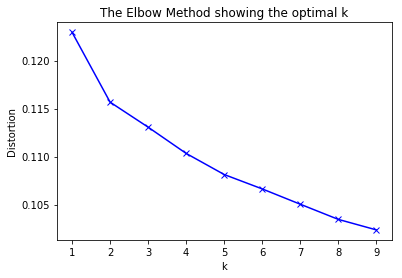

In [53]:
plt.plot()

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The Elbow Method suggests that k=2 is a reasonable choice for the number of clusters since the decrease in distortion is much lower as we go from 2 clusters to 3 clusters as compared to going from no clustering to 2 clusters. Furthermore, the distortion is quite low to begin with.  

In [55]:
nclusters = 2
# run k-means clustering with k=6
kmeansv = KMeans(n_clusters=2, random_state=0).fit(Xv)

# check cluster labels generated for each row in the dataframe
kmeansv.labels_[0:10]

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

Now that each city is assigned to a cluster, I combine this information together with the crime data. 

In [56]:
# add clustering labels
#venues_sorted.insert(0, 'Venue Clusters', kmeansv.labels_)

merged = df1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
merged = merged.join(venues_sorted.set_index('City'), on='City')
merged.insert(1, 'Venue Clusters', kmeansv.labels_)

merged.head() 

,Safety Cluster,Venue Clusters,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,1,Alabama,Mobile,-0.420133,0.768987,-0.326875,0.192678,1.757566,0.102692,30.694357,-88.043054,Seafood Restaurant,Fast Food Restaurant,Pharmacy,Sandwich Place,Fried Chicken Joint
1,2,0,Alaska,Anchorage,-0.371349,-0.232628,0.209268,1.285278,0.310485,2.013194,61.216313,-149.894852,Seafood Restaurant,Park,Coffee Shop,Pizza Place,Cosmetics Shop
2,0,0,Arizona,Chandler,-0.419189,-0.879447,-1.079831,-0.982938,-1.028806,-1.159680,33.306222,-111.841332,Mexican Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Taco Place
3,0,1,Arizona,Gilbert,-0.426610,-0.873989,-1.304666,-1.338684,-1.405250,-1.489464,33.352763,-111.789037,Pizza Place,Mexican Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant
4,2,0,Arizona,Glendale,-0.419272,-0.624722,-0.227554,-0.623603,-0.031377,-0.039290,33.538686,-112.185994,Pizza Place,Mexican Restaurant,Convenience Store,Sandwich Place,Fast Food Restaurant


I discuss the results in Section 4.3. 

## 4. Results

In this section, I will first discuss the results from the crime statistics analysis. Then, I will turn to the results from the Foursquare location data. 

### 4.1 Clusters Based on Crime Statistics

I start with having a look at how many cities are in each cluster. 

In [57]:
df1.loc[df1['Safety Cluster'] == 0].shape[0], df1.loc[df1['Safety Cluster'] == 1].shape[0], df1.loc[df1['Safety Cluster'] == 2].shape[0]

(38, 11, 51)

Based on the visual cues, I expect that the second cluster groups the few cities with high crime rates. 

Before checking the cities in each cluster, I also look at the mean values of each variable for each cluster. 

In [58]:
df1.loc[df1['Safety Cluster'] == 0].mean()

Safety Cluster      0.000000
Population         -0.023131
Murder             -0.623741
Robbery            -0.782984
Assault            -0.784848
Burglary           -0.868993
MV Theft           -0.776015
Latitude           34.397536
Longitude        -101.191128
dtype: float64

The first cluster is comprised of 38 cities. The average city size is about average. All crime statistics are below the mean values, from .62 standard deviations below the mean for Murder to .86 standard deviations below the mean for Burglary. I will call this group "Safe Cities."

In [59]:
df1.loc[df1['Safety Cluster'] == 1].mean()

Safety Cluster     1.000000
Population        -0.196266
Murder             1.836600
Robbery            1.991968
Assault            1.897106
Burglary           1.561164
MV Theft           1.654719
Latitude          37.861944
Longitude        -94.682001
dtype: float64

The second cluster is comprised of 11 cities. Their population is slightly lower than the average, and their crime statistics are significantly higher: from 1.56 standardard deviations above from mean for Burglary to 1.99 standard deviations above the mean for Robbery. I will call this group "Dangerous Cities."

In [60]:
df1.loc[df1['Safety Cluster'] == 2].mean()

Safety Cluster     2.000000
Population         0.059567
Murder             0.068619
Robbery            0.153760
Assault            0.175609
Burglary           0.310763
MV Theft           0.221307
Latitude          37.540540
Longitude        -98.343785
dtype: float64

The third group cluster is comprised of 51 cities, more than half of the cities. Their average is slightly higher than the average population, and their average crime rate is slightly higher than the average. I will call this group "Larger Cities."

Based on this information, I would recommend someone concerned about average city safety to move to a city within the first group and avoid cities in the second group.

Now, we can see which cities are included in each group. 

### Safe Cities

In [61]:
df1.loc[df1['Safety Cluster'] == 0]

,Safety Cluster,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude
2,0,Arizona,Chandler,-0.419189,-0.879447,-1.079831,-0.982938,-1.028806,-1.159680,33.306222,-111.841332
3,0,Arizona,Gilbert,-0.426610,-0.873989,-1.304666,-1.338684,-1.405250,-1.489464,33.352763,-111.789037
5,0,Arizona,Mesa,-0.171056,-0.637458,-0.858757,-0.567133,-0.821657,-1.052364,33.415112,-111.831477
7,0,Arizona,Scottsdale,-0.416650,-0.881267,-1.187862,-1.239784,-0.923147,-1.341481,33.509121,-111.899237
9,0,California,Anaheim,-0.312908,-0.804849,-0.585610,-0.861081,-0.819218,-0.136015,33.834752,-117.911732
11,0,California,Chula Vista,-0.396967,-0.994983,-0.734058,-0.934446,-1.270691,-0.695398,32.640054,-117.084196
12,0,California,Fremont,-0.432455,-0.984976,-0.940971,-1.243407,-1.120447,-0.394455,37.548270,-121.988572
14,0,California,Irvine,-0.391854,-0.996803,-1.311872,-1.416578,-1.298449,-1.438277,33.685697,-117.825982
18,0,California,Riverside,-0.338830,-0.729341,-0.397496,-0.494117,-0.424804,0.175483,33.953355,-117.396162
21,0,California,San Diego,0.780815,-0.838509,-0.816272,-0.712923,-1.172011,-0.413448,32.717421,-117.162771


### Dangerous Cities

In [62]:
df1.loc[df1['Safety Cluster'] == 1]

,Safety Cluster,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude
17,1,California,Oakland,-0.239856,0.415102,2.509620,0.448096,-0.094334,2.878850,37.804456,-122.271356
20,1,California,San Bernardino,-0.451974,0.361427,1.092814,1.283746,1.036048,2.013476,34.108345,-117.289765
48,1,Louisiana,Baton Rouge,-0.441612,2.418332,0.955144,0.461020,2.380619,-0.147912,30.445960,-91.187380
50,1,Maryland,Baltimore,-0.047508,4.011273,4.570851,1.810398,2.049162,1.290507,39.290882,-76.610759
52,1,Michigan,Detroit,0.011304,2.558431,1.028584,3.793690,1.801534,2.605372,42.331551,-83.046640
55,1,Missouri,Kansas City,-0.178533,1.751498,0.964104,2.744878,0.966144,1.536274,39.100105,-94.578142
56,1,Missouri,St. Louis,-0.356950,4.948297,2.489255,3.016844,1.123027,1.400294,38.626804,-90.199410
64,1,New Mexico,Albuquerque,-0.100464,0.072133,1.833864,1.114546,1.848311,3.145657,35.084103,-106.650985
71,1,Ohio,Cleveland,-0.280270,1.464023,2.948949,0.939181,2.690123,1.423769,41.505161,-81.693445
79,1,Tennessee,Memphis,-0.007110,1.460384,1.881864,3.222621,2.509126,0.477944,35.149022,-90.051629


### Larger Cities

In [63]:
df1.loc[df1['Safety Cluster'] == 2]

,Safety Cluster,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude
0,2,Alabama,Mobile,-0.420133,0.768987,-0.326875,0.192678,1.757566,0.102692,30.694357,-88.043054
1,2,Alaska,Anchorage,-0.371349,-0.232628,0.209268,1.285278,0.310485,2.013194,61.216313,-149.894852
4,2,Arizona,Glendale,-0.419272,-0.624722,-0.227554,-0.623603,-0.031377,-0.039290,33.538686,-112.185994
6,2,Arizona,Phoenix,1.005605,-0.193509,-0.181685,0.178012,0.404349,-0.043173,33.448587,-112.077346
8,2,Arizona,Tucson,-0.130140,-0.276295,0.247806,0.000731,0.566450,-0.090088,32.221892,-110.926235
10,2,California,Bakersfield,-0.284558,-0.083432,-0.198729,-0.639802,0.970961,0.885673,35.373871,-119.019464
13,2,California,Fresno,-0.136220,-0.094348,-0.296233,-0.317846,0.140882,0.184132,36.729529,-119.708861
15,2,California,Long Beach,-0.192376,-0.637458,0.207639,-0.288618,-0.188538,0.357355,33.769016,-118.191605
16,2,California,Los Angeles,3.419349,-0.424581,0.254385,-0.025675,-0.715257,0.004519,34.053691,-118.242767
19,2,California,Sacramento,-0.163161,-0.352712,-0.058114,-0.008849,-0.216172,0.232671,38.581572,-121.494400


When we look at the poverty rates, we notice that most of the cities in the second group has some of the highest poverty rates in the country. For instance, the poverty rate in Detroit, Michigan is 39.3%, in Cleveland, Ohio, it is 35.4%, and in San Bernardino, CA it is 32.4%. Compare this to the poverty rate in Fremont, CA is 6%, in Gilbert, Arizona it is 6.7%, and in Plano, Texas, it is 7.7%. Not surprisingly, all these cities are in the Safe Cities group. 

    Source: 'https://www.indexmundi.com/facts/united-states/quick-facts/cities/rank/percent-of-people-of-all-ages-in-poverty'


## 4.2 Mapping City Clusters Based on Crime Statistics

First, import necessary libraries.

In [64]:
import folium

Next, obtain the coordinates for the US. 

In [65]:
address = 'USA'

#geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the United States are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the United States are 39.7837304, -100.4458825.


Now, I can map the clusters using folium. 

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, cluster in zip(df1['Latitude'], df1['Longitude'], df1['City'], df1['Safety Cluster']):
    label = folium.Popup(str(city) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 4.3 Clusters Based on Venue Categories

As with the clusters based on crime statistics, I start with looking into summary information about each cluster. 

In [71]:
merged.loc[merged['Venue Clusters'] == 0].shape[0], merged.loc[merged['Venue Clusters'] == 1].shape[0]

(70, 30)

The first cluster is comprised of 70 cities and the second one is comprised of 30 cities. 

In [67]:
merged.loc[merged['Venue Clusters'] == 0].mean()

Safety Cluster      1.071429
Venue Clusters      0.000000
Population          0.037063
Murder             -0.031031
Robbery            -0.004297
Assault            -0.075172
Burglary           -0.088914
MV Theft           -0.023325
Latitude           37.115059
Longitude        -100.470354
dtype: float64

The first cluster cities has a very slightly higher population than the average and slightly lower crime rates across all crime categories. 

In [68]:
merged.loc[merged['Venue Clusters'] == 1].mean()

Safety Cluster     1.266667
Venue Clusters     1.000000
Population        -0.086480
Murder             0.072406
Robbery            0.010025
Assault            0.175402
Burglary           0.207465
MV Theft           0.054424
Latitude          34.670040
Longitude        -95.645771
dtype: float64

The second cluster has a slightly smaller population than the average and its crime rates are slightly higher than the average. 

Next, I look at the list of cities in each cluster and the 5 most common venue categories. I expect to see more of the Dangerous Cities (Safety Cluster = 2) in the second cluster.  

In [72]:
merged.loc[merged['Venue Clusters'] == 0]

,Safety Cluster,Venue Clusters,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,2,0,Alaska,Anchorage,-0.371349,-0.232628,0.209268,1.285278,0.310485,2.013194,61.216313,-149.894852,Seafood Restaurant,Park,Coffee Shop,Pizza Place,Cosmetics Shop
2,0,0,Arizona,Chandler,-0.419189,-0.879447,-1.079831,-0.982938,-1.028806,-1.159680,33.306222,-111.841332,Mexican Restaurant,Pizza Place,Coffee Shop,Chinese Restaurant,Taco Place
4,2,0,Arizona,Glendale,-0.419272,-0.624722,-0.227554,-0.623603,-0.031377,-0.039290,33.538686,-112.185994,Pizza Place,Mexican Restaurant,Convenience Store,Sandwich Place,Fast Food Restaurant
6,2,0,Arizona,Phoenix,1.005605,-0.193509,-0.181685,0.178012,0.404349,-0.043173,33.448587,-112.077346,Pizza Place,Coffee Shop,Art Gallery,Hotel,Music Venue
8,2,0,Arizona,Tucson,-0.130140,-0.276295,0.247806,0.000731,0.566450,-0.090088,32.221892,-110.926235,Coffee Shop,Pizza Place,Ice Cream Shop,Sandwich Place,Bar
9,0,0,California,Anaheim,-0.312908,-0.804849,-0.585610,-0.861081,-0.819218,-0.136015,33.834752,-117.911732,Theme Park Ride / Attraction,Theme Park,Burger Joint,Gift Shop,Hotel
10,2,0,California,Bakersfield,-0.284558,-0.083432,-0.198729,-0.639802,0.970961,0.885673,35.373871,-119.019464,Mexican Restaurant,Grocery Store,Pizza Place,Coffee Shop,Steakhouse
11,0,0,California,Chula Vista,-0.396967,-0.994983,-0.734058,-0.934446,-1.270691,-0.695398,32.640054,-117.084196,Mexican Restaurant,Coffee Shop,Taco Place,Hotel,Seafood Restaurant
12,0,0,California,Fremont,-0.432455,-0.984976,-0.940971,-1.243407,-1.120447,-0.394455,37.548270,-121.988572,Coffee Shop,Grocery Store,Sushi Restaurant,Pizza Place,Breakfast Spot
14,0,0,California,Irvine,-0.391854,-0.996803,-1.311872,-1.416578,-1.298449,-1.438277,33.685697,-117.825982,Sandwich Place,Burger Joint,Coffee Shop,Ice Cream Shop,Café


In [73]:
merged.loc[merged['Venue Clusters'] == 1]

,Safety Cluster,Venue Clusters,State,City,Population,Murder,Robbery,Assault,Burglary,MV Theft,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,2,1,Alabama,Mobile,-0.420133,0.768987,-0.326875,0.192678,1.757566,0.102692,30.694357,-88.043054,Seafood Restaurant,Fast Food Restaurant,Pharmacy,Sandwich Place,Fried Chicken Joint
3,0,1,Arizona,Gilbert,-0.426610,-0.873989,-1.304666,-1.338684,-1.405250,-1.489464,33.352763,-111.789037,Pizza Place,Mexican Restaurant,Coffee Shop,Sandwich Place,Sushi Restaurant
5,0,1,Arizona,Mesa,-0.171056,-0.637458,-0.858757,-0.567133,-0.821657,-1.052364,33.415112,-111.831477,Mexican Restaurant,Convenience Store,Coffee Shop,Burger Joint,Brewery
7,0,1,Arizona,Scottsdale,-0.416650,-0.881267,-1.187862,-1.239784,-0.923147,-1.341481,33.509121,-111.899237,American Restaurant,Pizza Place,Coffee Shop,Mexican Restaurant,Bar
13,2,1,California,Fresno,-0.136220,-0.094348,-0.296233,-0.317846,0.140882,0.184132,36.729529,-119.708861,Fast Food Restaurant,Sandwich Place,Mexican Restaurant,Rental Car Location,Pharmacy
15,2,1,California,Long Beach,-0.192376,-0.637458,0.207639,-0.288618,-0.188538,0.357355,33.769016,-118.191605,Beach,Mexican Restaurant,Hotel,Coffee Shop,American Restaurant
17,1,1,California,Oakland,-0.239856,0.415102,2.509620,0.448096,-0.094334,2.878850,37.804456,-122.271356,Coffee Shop,Beer Garden,Japanese Restaurant,Ice Cream Shop,Brewery
22,2,1,California,San Francisco,0.226289,-0.484623,0.852941,-0.449109,-0.270515,0.250110,37.779281,-122.419236,Yoga Studio,Coffee Shop,Bakery,Grocery Store,Dance Studio
31,0,1,Florida,Hialeah,-0.430522,-0.833051,-1.031644,-1.090442,-1.231108,-0.671394,25.857596,-80.278106,Cuban Restaurant,Grocery Store,Bakery,Latin American Restaurant,American Restaurant
32,2,1,Florida,Jacksonville,0.239960,0.045750,-0.472879,-0.088311,-0.051015,-0.532130,30.332184,-81.655651,Park,Sandwich Place,Bar,Brewery,Coffee Shop


Scanning through the common venue categories does not give much clue.  

We can also try to visualize the relation between the two types of venues. 

In [74]:
x = merged['Safety Cluster']
y = merged['Venue Clusters']

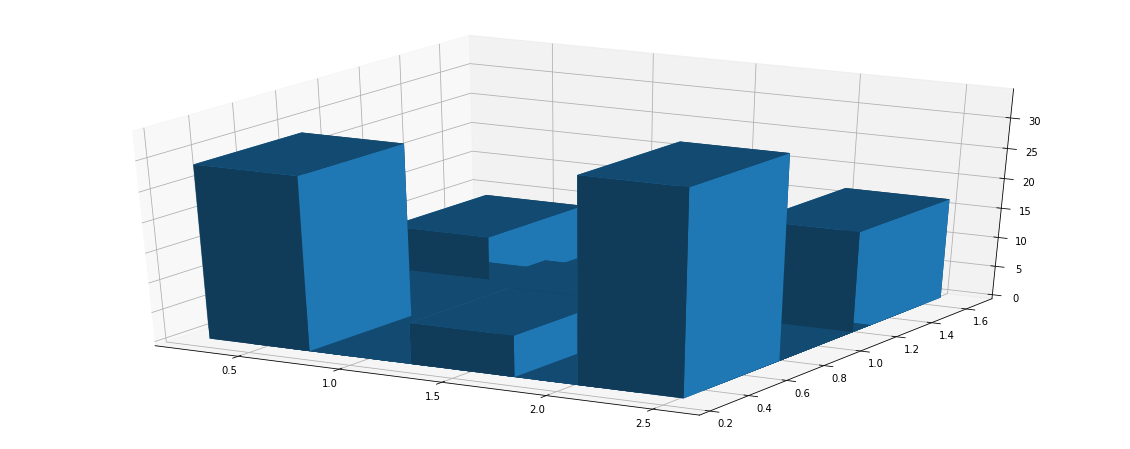

In [76]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, range=[[0, 2], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

There doesn't seem to be any meaningful relationship between the clusters based on the overall city safety and the clusters based on the venues in the city. 

### 4.4 Mapping Clusters Based on Venues

Finally, I map the clusters based on venues. 

In [77]:
# create map
map_venue_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(nclusters)
ys = [i + x + (i*x)**2 for i in range(nclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, city, cluster in zip(merged['Latitude'], merged['Longitude'], merged['City'], merged['Venue Clusters']):
    label = folium.Popup(str(city) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_venue_clusters)
       
map_venue_clusters

There is not much of a geographic pattern either. 

## 5. Discussion

I have already discussed my observations in the Results section as well as in the Methodology section. 

Results show that although it is possible to have a meanigful clustering based on crime statistics, it is not the case for the venue categories. These are the largest cities in the US, and they offer a variety of venues to their large number of residents. The venues are not related to the crime statistics in cities, and these cities are not that different from each other. 

It is possible to see that from the Elbow Method plots as well. Even with a single cluster, the distortion is 0.1225 while the distortion at a single cluster with crime statistic is around 1.9. 

## 6. Conclusions

This report shows that some of the US cities have significantly higher crime statistics than others. In most cities, crime is localized and it is possible to live in low-crime areas even in high crime cities. But for someone who prefers to live in a low crime city, there are 11 cities to be avoided. 

On the other hand, largest 100 US cities do not differ much from each other in terms of the venues they offer. Furthermore, there is not much of a relation between the crime statistics and the tye of venues common in a city. Hence, there is no need to focus on venues as one decides where to live in the US assuming that small towns are not desired/not an option. 